This notebook is to illustrate a strange phenomenon in the output of tree mortality in FATES. 

In [3]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import datetime
import cartopy
import cartopy.crs as ccrs

Illustrate parameter file - made from 6 identical BETs. THe only parameter effecting background mortality should be bmort.  

In [6]:
pfile='/glade/u/home/rfisher/python_scripts/fates_6pft_BET_bugtest.nc'
params=xr.open_dataset(pfile)
print(params.fates_mort_bmort)

<xarray.DataArray 'fates_mort_bmort' (fates_pft: 6)>
array([0.014, 0.014, 0.014, 0.014, 0.014, 0.014])
Dimensions without coordinates: fates_pft
Attributes:
    units:      1/yr
    long_name:  background mortality rate


Reading in data from a run call 'testnextapi_f45_fates_bugtest'

In [7]:
run = 'testnextapi_f45_fates_bugtest'
scratch = '/glade/scratch/rfisher/'

Read in first ten years of simulation. 

In [9]:
arc= scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.'
arc= scratch+ run + '/run/' + run + '.clm2.h0.'
ds8 = xr.open_mfdataset(arc + '000*.nc',  decode_times=False)

Plot out timeseries from specific sites. 

In [14]:
lats = [22,23]
lons = [56, 57, 58, 60, 61, 62 ]

Plot biomass per PFT for four tropical sites. 

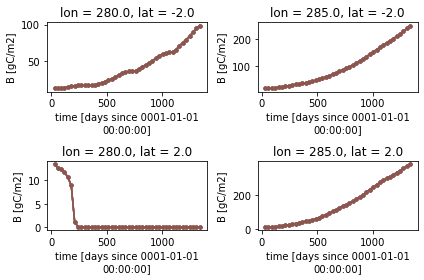

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.PFTbiomass.attrs['long_name'] = 'B'
ds8.PFTbiomass.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False, marker='.')
ds8.PFTbiomass.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False, marker='.')
ds8.PFTbiomass.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False, marker='.')
ds8.PFTbiomass.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False, marker='.')
plt.tight_layout()
plt.draw()

Plot N individuals for four tropical sites. 

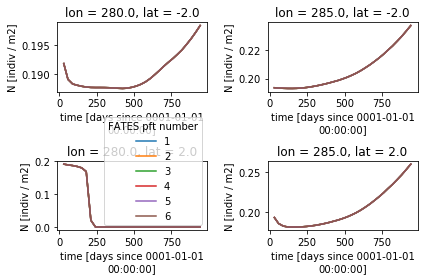

In [34]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.PFTnindivs.attrs['long_name'] = 'N'
ds8.PFTnindivs.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.PFTnindivs.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0])
ds8.PFTnindivs.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.PFTnindivs.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

Recruitment

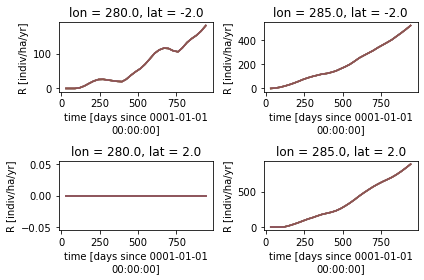

In [33]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.RECRUITMENT.attrs['long_name'] = 'R'
ds8.RECRUITMENT.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.RECRUITMENT.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False)
ds8.RECRUITMENT.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.RECRUITMENT.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

TOTAL mortality, indexed by size class


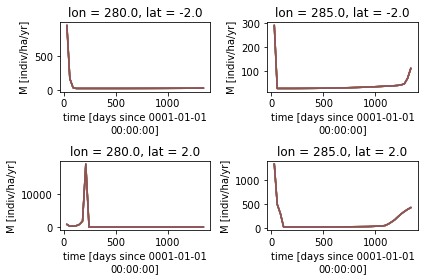

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.MORTALITY.attrs['long_name'] = 'M'
ds8.MORTALITY.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.MORTALITY.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False)
ds8.MORTALITY.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.MORTALITY.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

Mortality by type: background, C starvation, hydraulic, Termination.   For the first of the previous sites. 

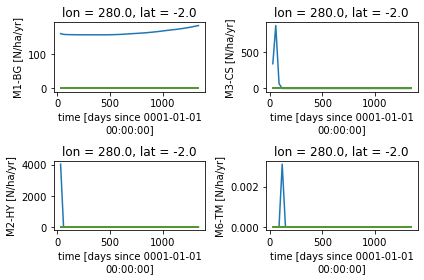

In [18]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.M1_SCLS.attrs['long_name'] = 'M1-BG'
ds8.M2_SCLS.attrs['long_name'] = 'M2-HY'
ds8.M3_SCLS.attrs['long_name'] = 'M3-CS'
ds8.M4_SCLS.attrs['long_name'] = 'M4-IM'
ds8.M5_SCLS.attrs['long_name'] = 'M5-FR'
ds8.M6_SCLS.attrs['long_name'] = 'M6-TM'
ds8.M1_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.M2_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False)
ds8.M3_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.M6_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

Background mortality per PFT for each site. Note that the bmort parameter and N are the same for all PFTs...

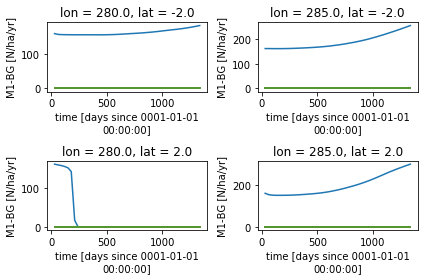

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ds8.M1_SCLS.isel(lat=lats[0], lon=lons[0]).plot.line(x='time', ax=axes[0, 0], add_legend=False)
ds8.M1_SCLS.isel(lat=lats[1], lon=lons[0]).plot.line(x='time', ax=axes[1, 0], add_legend=False)
ds8.M1_SCLS.isel(lat=lats[0], lon=lons[1]).plot.line(x='time', ax=axes[0, 1], add_legend=False)
ds8.M1_SCLS.isel(lat=lats[1], lon=lons[1]).plot.line(x='time', ax=axes[1, 1], add_legend=False)
plt.tight_layout()
plt.draw()

In [24]:
pft=1
print(ds8.M1_SCLS)
ds8.M1_SCLS.isel(fates_levpft=pft).plot()


<xarray.DataArray 'M1_SCLS' (time: 44, fates_levscls: 13, lat: 46, lon: 72)>
dask.array<shape=(44, 13, 46, 72), dtype=float32, chunksize=(2, 13, 46, 72)>
Coordinates:
  * time           (time) float64 31.0 59.0 90.0 ... 1.307e+03 1.338e+03
  * fates_levscls  (fates_levscls) float32 0.0 5.0 10.0 15.0 ... 80.0 90.0 100.0
  * lon            (lon) float32 0.0 5.0 10.0 15.0 ... 340.0 345.0 350.0 355.0
  * lat            (lat) float32 -90.0 -86.0 -82.0 -78.0 ... 78.0 82.0 86.0 90.0
Attributes:
    long_name:     M1-BG
    units:         N/ha/yr
    cell_methods:  time: mean


ValueError: dimensions ['fates_levpft'] do not exist